In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
# function to convert image to flatenned array
def img_to_array(img_loc):
    tumor_folder = img_loc
    img_names = os.listdir(tumor_folder)

    images_tensors = []
    for imgs in img_names:
        path_to_image = os.path.join(tumor_folder,imgs)
        read_imgs = tf.io.read_file(path_to_image)
        decode_imgs = tf.image.decode_image(read_imgs,channels=1)  #converts image to tensor
        resize_imgs = tf.image.resize(decode_imgs, (256,256))
        images_tensors.append(resize_imgs)   
         
    #conver to numpy arrays
    numpy_arr = []
    for tensor in images_tensors:
        ten = tf.image.convert_image_dtype(tensor,tf.float32)  #converts tensor to numpy array
        numpy_arr.append(ten)
    brain_ct = np.array(numpy_arr)
    print("Before flatten: ", brain_ct.shape)

    for i in range(2):  # Display the first 2 images
        print("image in ",img_loc)
        plt.imshow(brain_ct[i, :, :, 0], cmap='gray')
        plt.show()
    
    #flatten 4D to 2D
    flatenned_brain_ct = brain_ct.reshape(brain_ct.shape[0],-1)
    flatenned_brain_ct.shape
    df = pd.DataFrame(flatenned_brain_ct)  #convert array to dataframe
    print("After flatten: ", df.shape)

    return df

Before flatten:  (1500, 256, 256, 1)
image in  ./yes


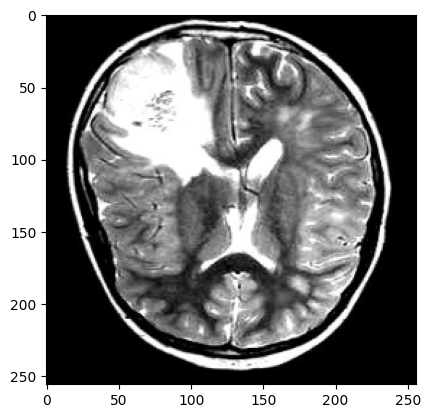

image in  ./yes


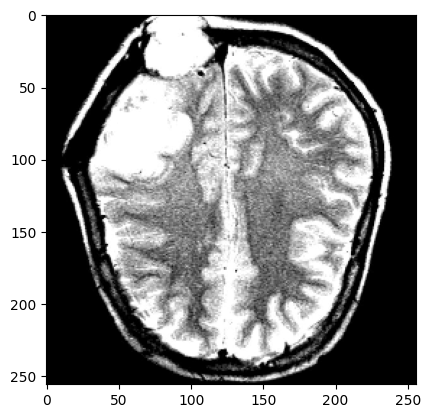

After flatten:  (1500, 65536)


In [3]:
yes_tumor = img_to_array("./yes")

Before flatten:  (1500, 256, 256, 1)
image in  ./no


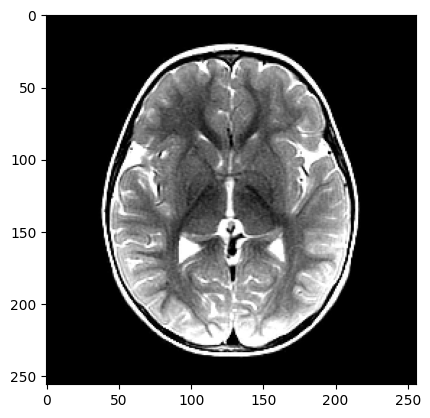

image in  ./no


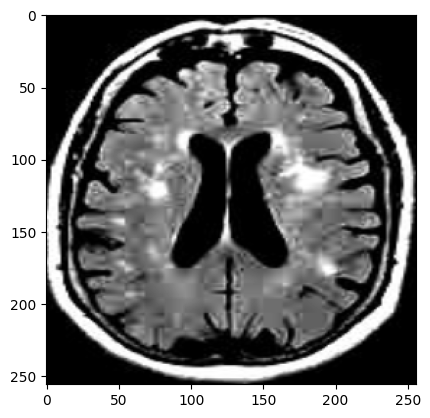

After flatten:  (1500, 65536)


In [4]:
no_tumor = img_to_array("./no")

In [6]:
yes_tumor.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
1490,241.511475,245.149658,229.732910,252.975098,211.811035,103.781738,102.529297,114.125000,112.000000,112.000000,...,26.546875,26.546875,25.766602,19.970947,17.789062,17.039062,22.415283,24.414307,16.801758,34.088623
1491,254.736328,247.458099,244.937897,251.316345,251.979950,167.632004,50.777359,9.811947,0.324337,0.192978,...,8.611088,6.221626,1.981304,9.562172,6.931595,5.223930,7.691463,59.210777,243.460037,248.894531
1492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1493,19.397110,9.011948,6.807831,10.743134,10.430374,8.827103,10.919250,10.001907,9.773438,9.773438,...,6.996094,6.999130,7.894531,8.826492,8.285156,6.628677,10.674835,7.332825,9.058823,27.882812
1494,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
1495,9.326096,50.912804,21.844070,5.559402,6.134346,26.960037,18.682457,1.481041,21.610199,47.567070,...,1.844048,1.863426,2.000000,2.000000,1.644051,0.626953,0.056236,0.000000,0.000000,0.000000
1496,19.728516,20.964821,22.374962,23.142525,23.527206,22.785156,22.830475,23.019531,23.019531,23.019531,...,5.000000,5.000000,5.000000,5.000000,4.009766,4.000000,4.000000,4.000000,4.000000,4.000000
1497,0.000000,0.000000,0.000000,0.560547,1.000000,1.880859,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1499,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.575836,2.582031,2.048065,1.355469,0.300781,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
yes_tumor['Tumor'] = 1
no_tumor['Tumor'] = 0

combined_df = pd.concat([yes_tumor,no_tumor],axis=0)
combined_df.shape

(3000, 65537)

In [6]:
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,Tumor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [22]:
#split data into train and test
X = combined_df.drop('Tumor',axis=1)
y = combined_df['Tumor']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)

(2400, 65536)


In [41]:
print(y_train.value_counts())
print(y_test.value_counts())

Tumor
0    1213
1    1187
Name: count, dtype: int64
Tumor
1    313
0    287
Name: count, dtype: int64


In [23]:
#scale the data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_data_train = scaler.transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [10]:
scaled_data_train[0]

array([-0.43928382, -0.41826472, -0.40741062, ..., -0.40451685,
       -0.4153893 , -0.43412155], dtype=float32)

In [11]:
#apply PCA
components = np.array([2400,2000,1500,1000,500,250])
variance_captured = []
for component in components:
    pca = PCA(n_components=component)
    pca.fit(scaled_data_train)
    x_pca = pca.transform(scaled_data_train)
    variance_captured.append(pca.explained_variance_ratio_.sum())
variance_captured = np.array(variance_captured)

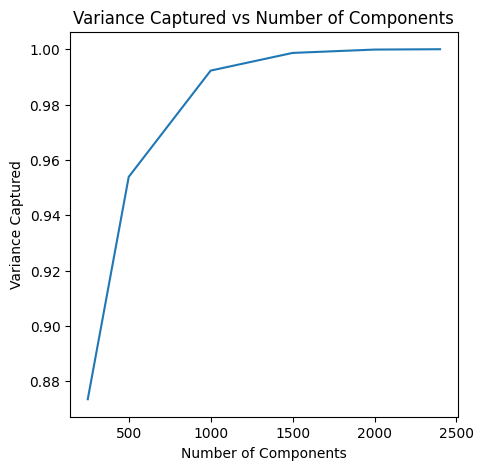

In [12]:
#plot variance captured
plt.figure(figsize=(5,5))
plt.plot(components,variance_captured)
plt.xlabel("Number of Components")
plt.ylabel("Variance Captured")
plt.title("Variance Captured vs Number of Components")
plt.show()

In [24]:
#fit pca with 1000 components
pca = PCA(n_components=1000)
pca.fit(scaled_data_train)
x_train_pca = pca.transform(scaled_data_train)
x_test_pca = pca.transform(scaled_data_test)

x_train_pca.shape

(2400, 1000)

In [34]:
scaled_data_train[:, 0].shape

(2400,)

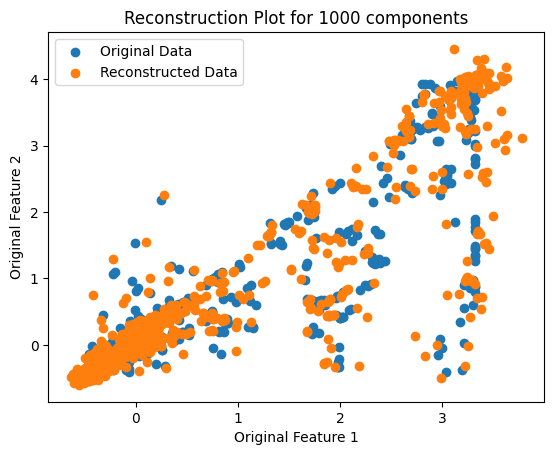

In [33]:
#reconstruction plot
reconstructed_data = pca.inverse_transform(x_train_pca)
plt.scatter(scaled_data_train[:, 0], scaled_data_train[:, 1], label='Original Data')
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.legend()
plt.title('Reconstruction Plot for 1000 components')
plt.show()

## 1000 components show a good reconstruction and capture maximum variance

In [42]:
x_train_pca.shape

(2400, 1000)

### Plot each score row to check if meaningful image is produced

Text(0.5, 1.0, 'row 8 of scores(No tumor)')

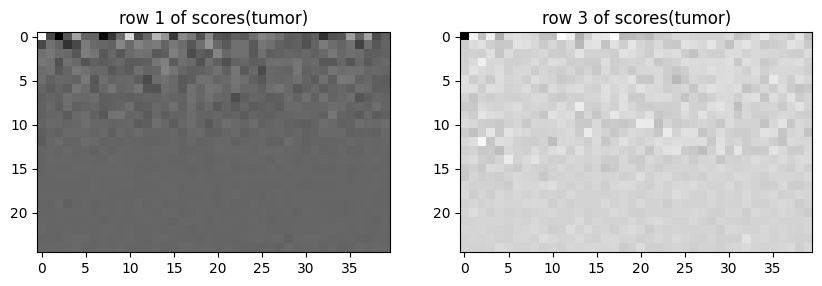

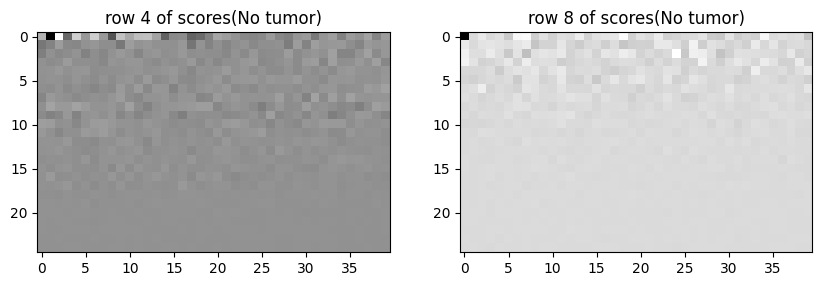

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

t1_image = x_train_pca[0].reshape(25, 40)
axs[0].imshow(t1_image, cmap='gray')
axs[0].set_title("row 1 of scores(tumor)")

t2_image = x_train_pca[2].reshape(25, 40)
axs[1].imshow(t2_image, cmap='gray')
axs[1].set_title("row 3 of scores(tumor)")


fig1, axs1 = plt.subplots(1, 2, figsize=(10, 4))

t3_image = x_train_pca[3].reshape(25, 40)
axs1[0].imshow(t3_image, cmap='gray')
axs1[0].set_title("row 4 of scores(No tumor)")

t4_image = x_train_pca[7].reshape(25, 40)
axs1[1].imshow(t4_image, cmap='gray')
axs1[1].set_title("row 8 of scores(No tumor)")

In [30]:
pca10 = PCA(n_components=10)
pca10.fit(scaled_data_train)
x_train_pca_10 = pca10.transform(scaled_data_train)
x_test_pca_10 = pca10.transform(scaled_data_test)

x_train_pca_10.shape

(2400, 10)

In [16]:
pca10.explained_variance_ratio_.sum()

0.46817824

In [27]:
pca10.components_[0,:]

array([0.00118784, 0.00132429, 0.00141154, ..., 0.00147368, 0.00143064,
       0.00132202], dtype=float32)

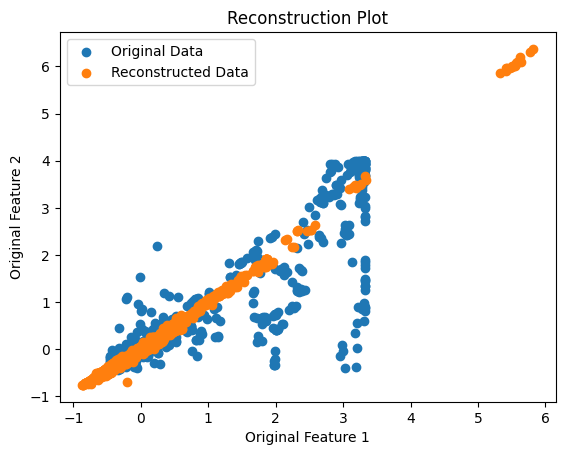

In [31]:
#reconstruction plot
reconstructed_data = pca10.inverse_transform(x_train_pca_10)
plt.scatter(scaled_data_train[:, 0], scaled_data_train[:, 1], label='Original Data')
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.legend()
plt.title('Reconstruction Plot')
plt.show()


In [37]:
def score_plot_pca(t,p):
    plt.figure(figsize=(6,4))
    scatter = plt.scatter(x_train_pca[:,t],x_train_pca[:,p],c=y_train,cmap='viridis',label='Labels')
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(0)), markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(1)), markersize=10)]
    labels = ['No Tumor', 'Tumor']
    plt.xlabel(f"T{t+1}")
    plt.ylabel(f"T{p+1}")
    plt.title(f"Score Plot -T{t+1}-T{p+1} Components")
    plt.legend(handles=handles, labels=labels, loc='upper left')
    plt.show()

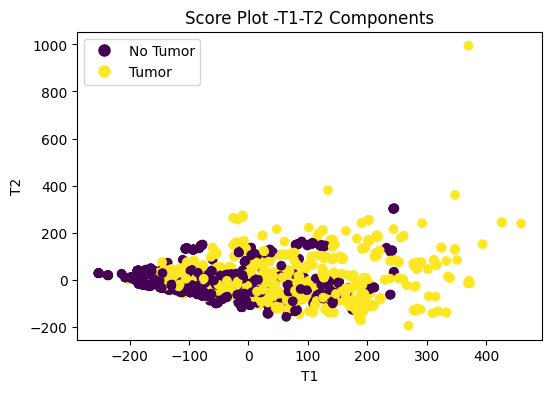

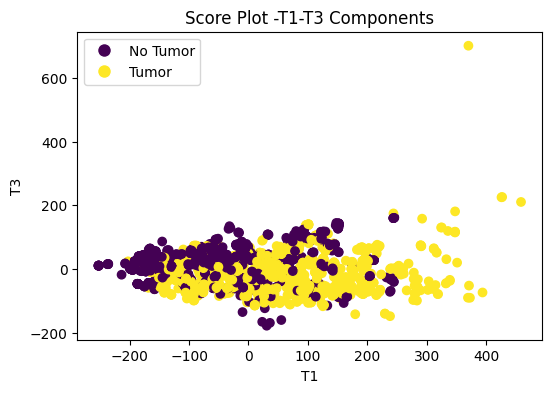

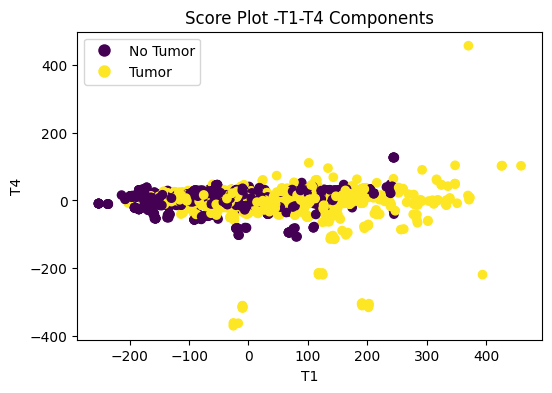

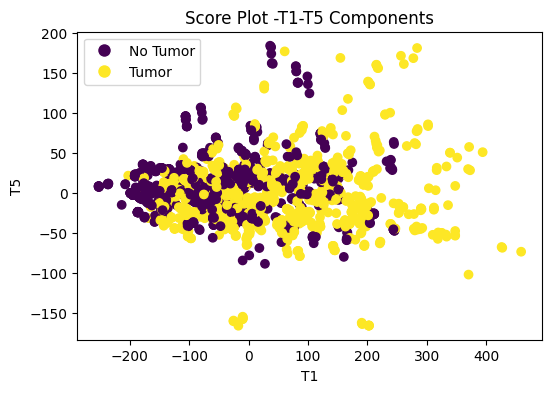

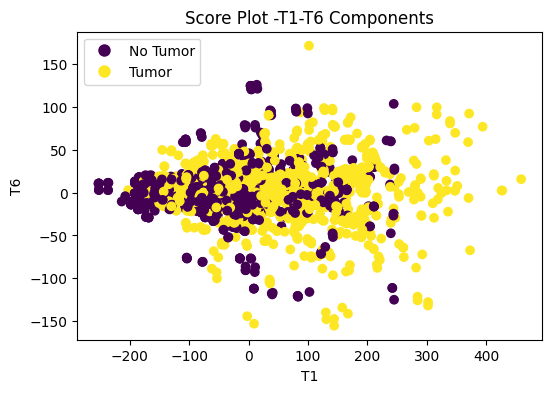

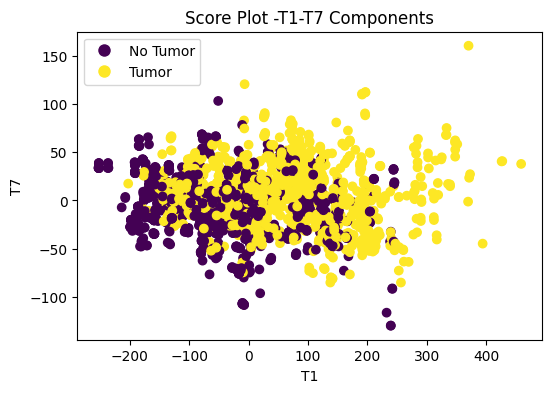

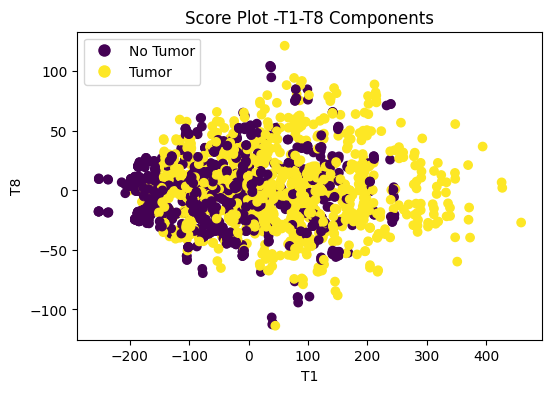

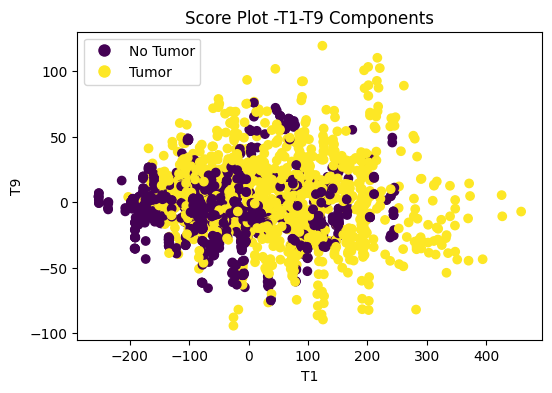

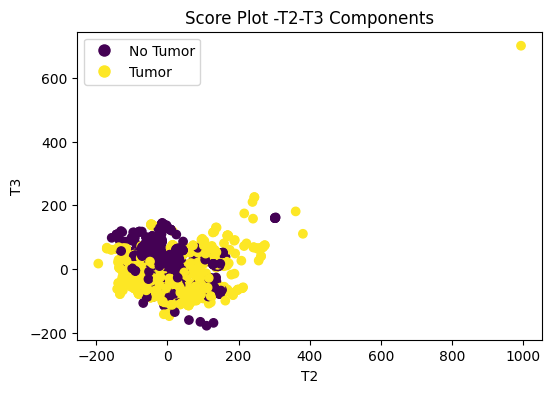

In [40]:
score_plot_pca(0,1)
score_plot_pca(0,2)
score_plot_pca(0,3)
score_plot_pca(0,4)
score_plot_pca(0,5)
score_plot_pca(0,6)
score_plot_pca(0,7)
score_plot_pca(0,8)
score_plot_pca(1,2)

### Images of loadings as pixels

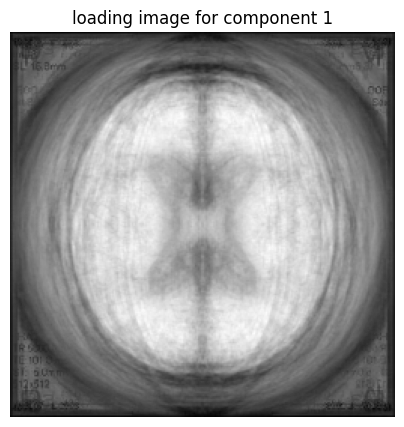

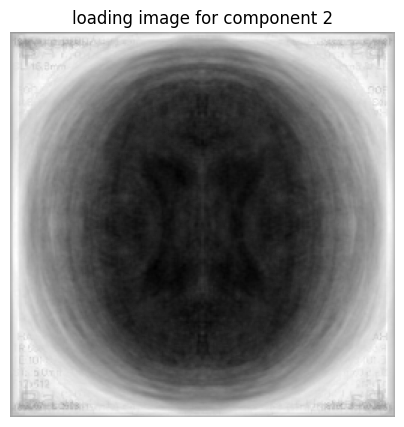

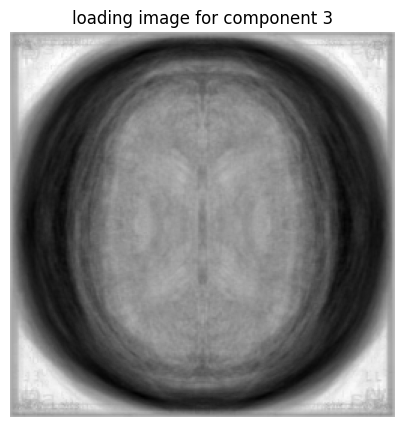

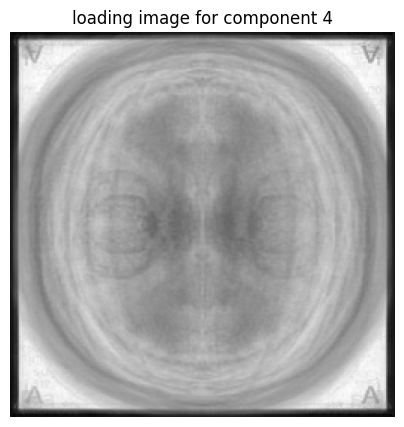

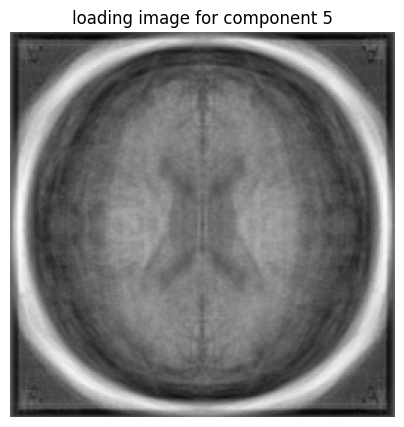

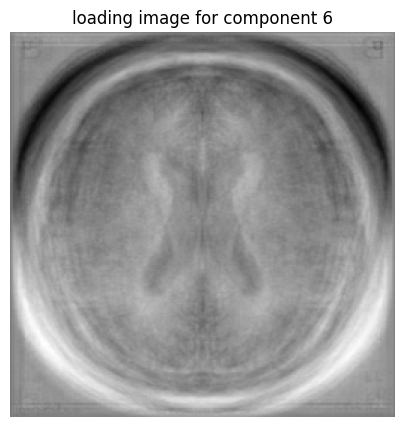

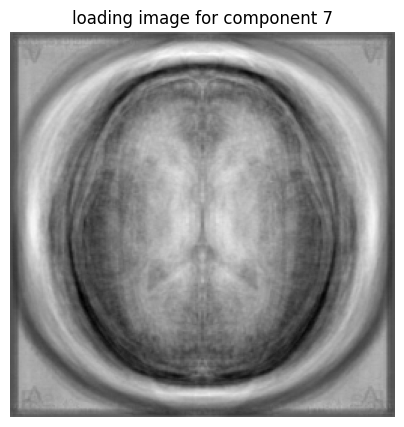

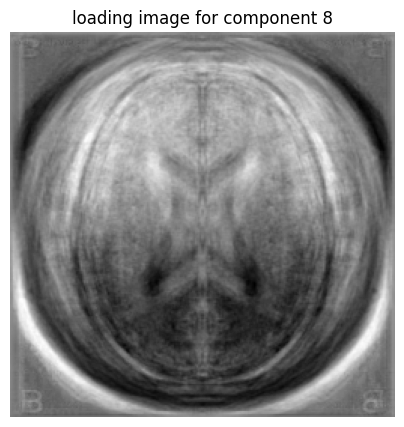

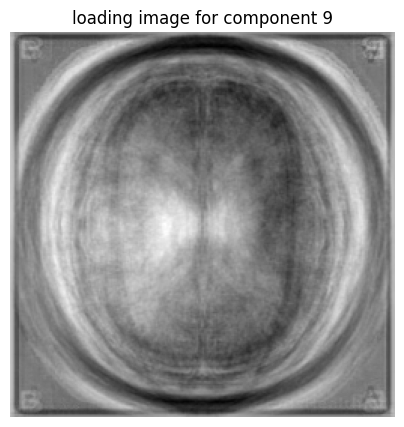

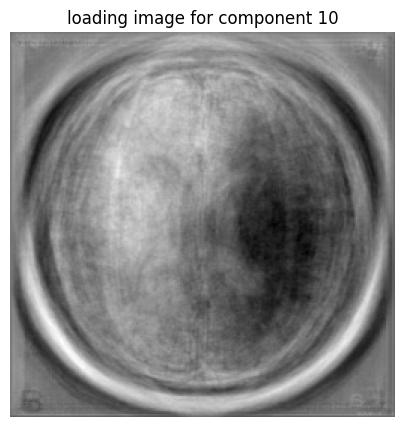

In [28]:
for i in range(10):
    loading_image = pca10.components_[i,:].reshape(256, 256)
    plt.figure(figsize=(5,5))
    plt.imshow(loading_image, cmap='gray')
    plt.axis('off')
    plt.title(f"loading image for component {i+1}")

## Image of t1 component 

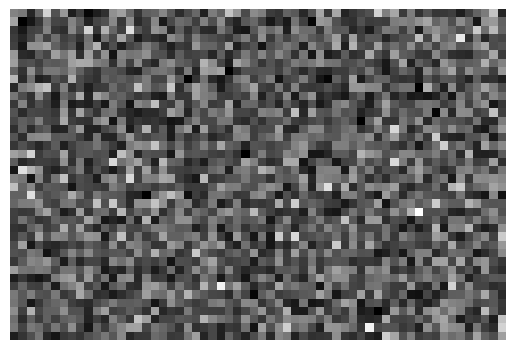

In [18]:
t1_image = x_train_pca[:, 0].reshape(40, 60)
plt.imshow(t1_image, cmap='gray')
plt.axis('off')
plt.show()

In [12]:
#fit pca with 4 components
pca1 = PCA(n_components=4)
pca1.fit(scaled_data_train)
x_train_pca_4 = pca1.transform(scaled_data_train)
x_test_pca_4 = pca1.transform(scaled_data_test)

x_train_pca_4.shape

(2400, 4)

In [38]:
pca1.explained_variance_ratio_.sum()

0.37877992

In [13]:
def score_plot_pca(t,p):
    plt.figure(figsize=(7,5))
    scatter = plt.scatter(x_train_pca_4[:,t],x_train_pca_4[:,p],c=y_train,cmap='viridis',label='Labels')
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(0)), markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(1)), markersize=10)]
    labels = ['No Tumor', 'Tumor']
    plt.xlabel(f"T{t+1}")
    plt.ylabel(f"T{p+1}")
    plt.title(f"Score Plot -T{t+1}-T{p+1} Components")
    plt.legend(handles=handles, labels=labels, loc='upper left')
    plt.show()

### top loadings for first component

In [24]:
#get top 20 loadings and its column names
loadings = pd.DataFrame(pca.components_[:1, :], columns=X_train.columns[:])
top_loadings = loadings.abs().max().sort_values(ascending=False).head(10)
top_loadings

18343    0.005876
18080    0.005838
51362    0.005812
15259    0.005812
18087    0.005804
36780    0.005802
16805    0.005800
14194    0.005800
17834    0.005796
14450    0.005796
dtype: float32

### top loading for component 2

In [25]:
loadings = pd.DataFrame(pca.components_[:2, :], columns=X_train.columns[:])
top_20_loadings = loadings.abs().max().sort_values(ascending=False).head(10)
top_20_loadings

50426    0.007887
50682    0.007859
38660    0.007847
12788    0.007832
15610    0.007832
15866    0.007826
13044    0.007823
50170    0.007818
38916    0.007807
38404    0.007805
dtype: float32

Text(0.5, 1.0, 'Loading Plot for First Component')

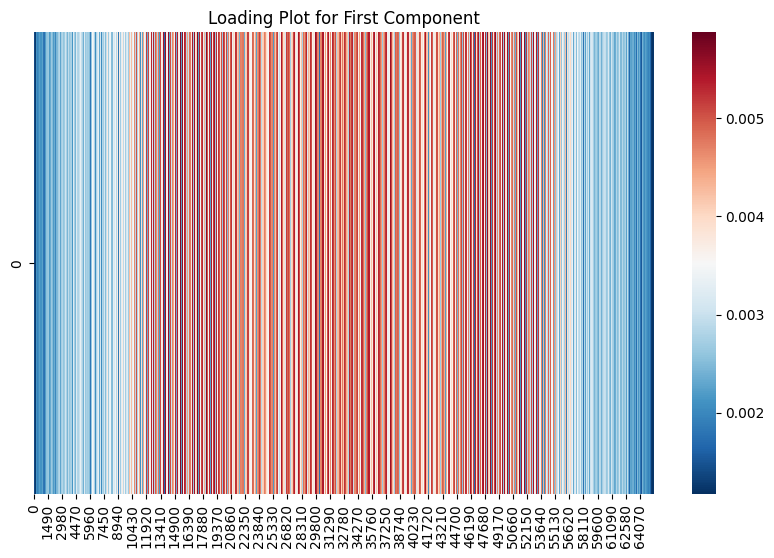

In [27]:
loadings = pca1.components_[:1,:] 
loadings_df = pd.DataFrame(loadings)
plt.figure(figsize=(10,6))
sns.heatmap(loadings_df,cmap='RdBu_r')
plt.title("Loading Plot for First Component")

Text(0.5, 1.0, 'Loading Plot for Second Component')

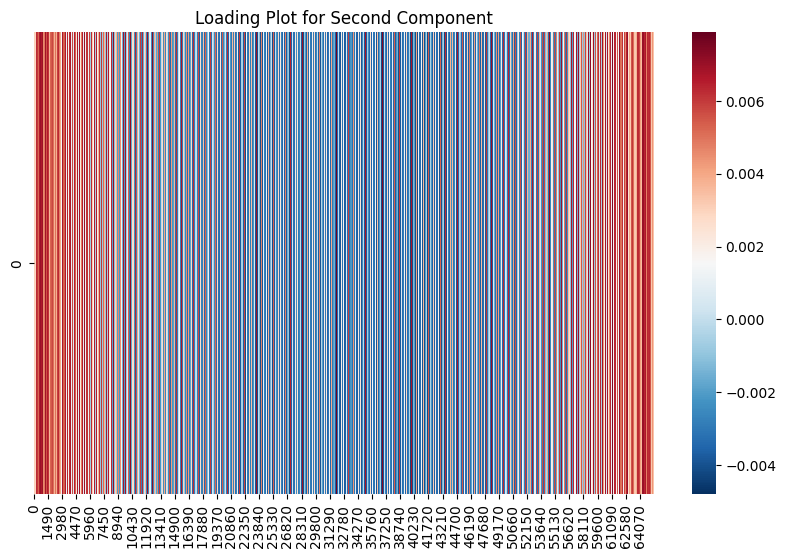

In [28]:
loadings = pca1.components_[1:2,:] 
loadings_df = pd.DataFrame(loadings)
plt.figure(figsize=(10,6))
sns.heatmap(loadings_df,cmap='RdBu_r')
plt.title("Loading Plot for Second Component")

Text(0.5, 1.0, 'Loading Plot for Third Component')

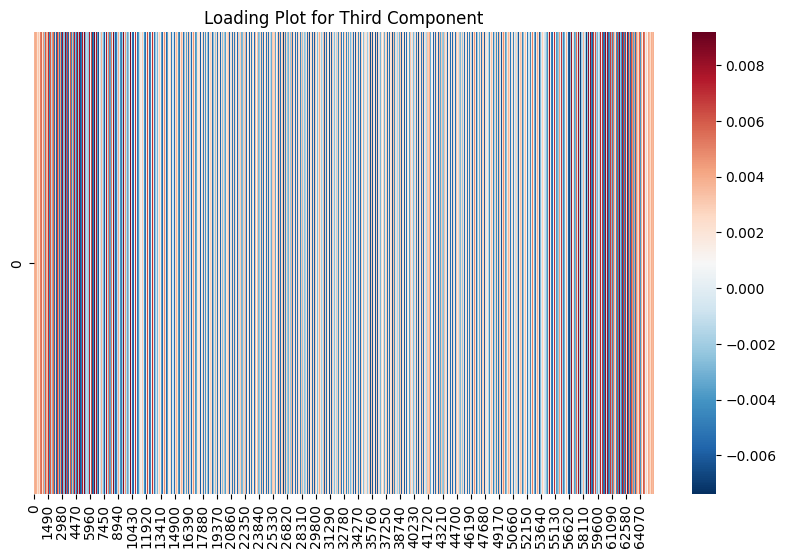

In [29]:
loadings = pca1.components_[2:3,:] 
loadings_df = pd.DataFrame(loadings)
plt.figure(figsize=(10,6))
sns.heatmap(loadings_df,cmap='RdBu_r')
plt.title("Loading Plot for Third Component")

Text(0.5, 1.0, 'Loading Plot for Fourth Component')

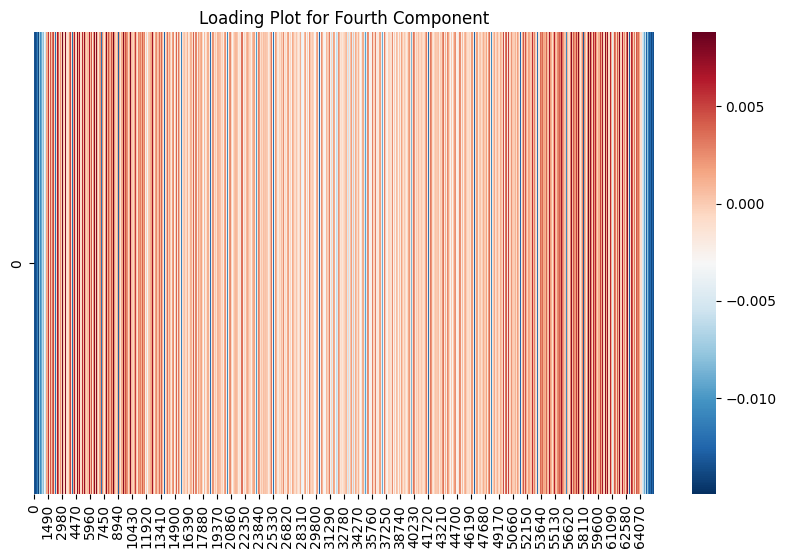

In [15]:
loadings = pca10.components_[3:4,:] 
loadings_df = pd.DataFrame(loadings)
plt.figure(figsize=(10,6))
sns.heatmap(loadings_df,cmap='RdBu_r')
plt.title("Loading Plot for Fourth Component")

Text(0.5, 1.0, 'Loading Plot for Fifth Component')

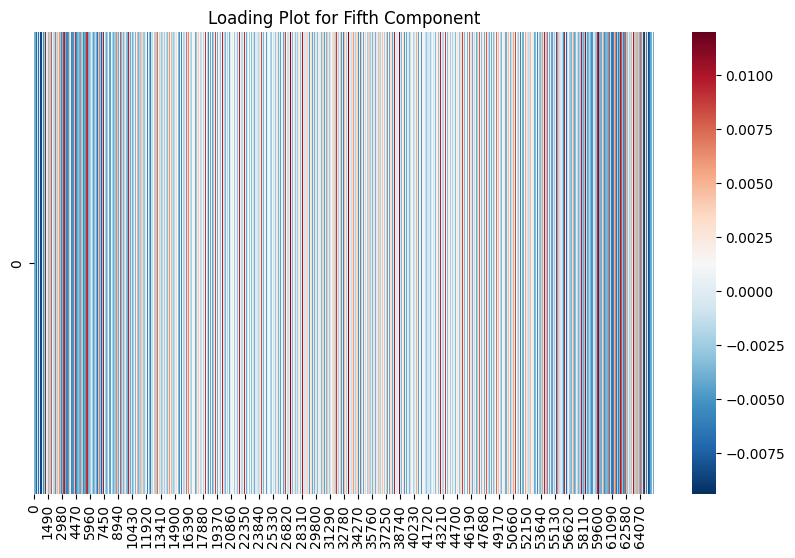

In [16]:
loadings = pca10.components_[4:5,:] 
loadings_df = pd.DataFrame(loadings)
plt.figure(figsize=(10,6))
sns.heatmap(loadings_df,cmap='RdBu_r')
plt.title("Loading Plot for Fifth Component")

Text(0.5, 1.0, 'Loading Plot for sixth Component')

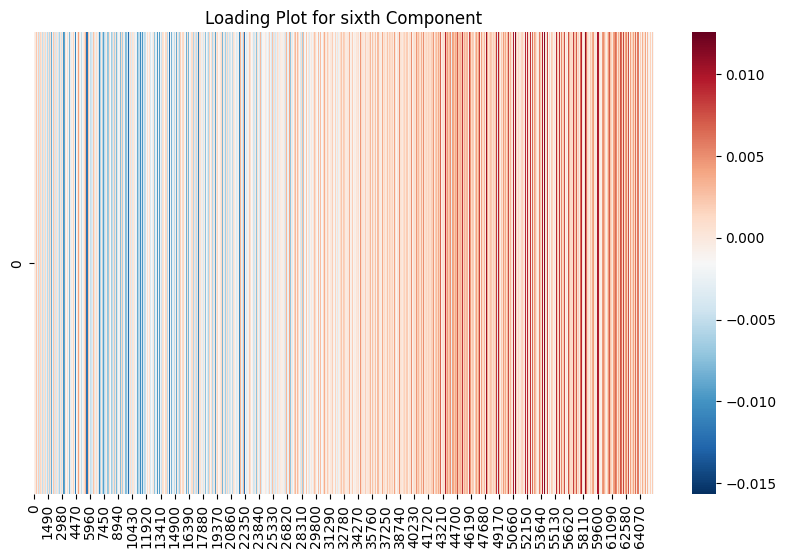

In [41]:
loadings = pca10.components_[5:6,:] 
loadings_df = pd.DataFrame(loadings)
plt.figure(figsize=(10,6))
sns.heatmap(loadings_df,cmap='RdBu_r')
plt.title("Loading Plot for sixth Component")

### PLS model

In [30]:
#create aa pls model
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=4)
pls.fit(scaled_data_train,y_train)

#predict on test data
y_pred = pls.predict(scaled_data_test)

#calculate accuracy
acc = accuracy_score(y_test,np.round(y_pred))
print("Accuracy of PLS model: ",acc)


Accuracy of PLS model:  0.7633333333333333


(65536,)


Text(0.5, 1.0, 'Loading Plot for First Component')

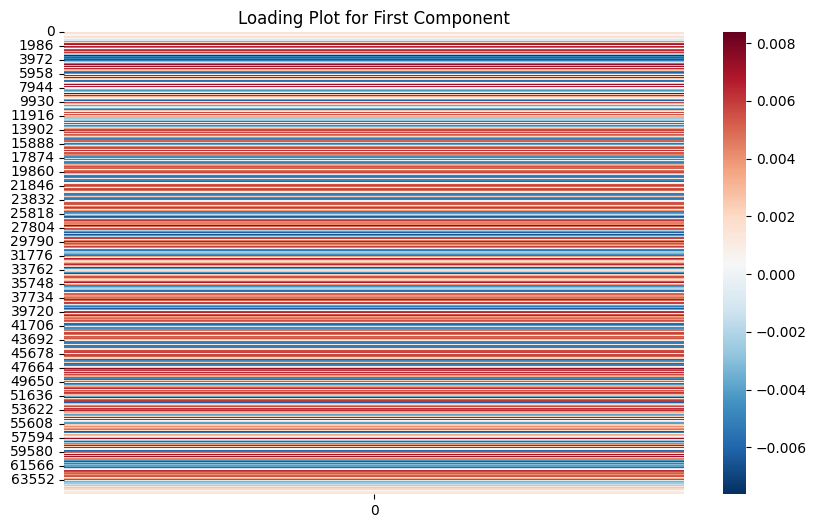

In [31]:
loadings = pls.x_loadings_[:,1]
print(loadings.shape)
loadings_df = pd.DataFrame(loadings)
plt.figure(figsize=(10,6))
sns.heatmap(loadings_df,cmap='RdBu_r')
plt.title("Loading Plot for First Component")


In [32]:
scores = pls.x_scores_
scores_df = pd.DataFrame(scores)
scores.shape

(2400, 4)

In [33]:
def score_plot_pls(t,p):
    plt.figure(figsize=(7,5))
    scatter = plt.scatter(scores[:,t],scores[:,p],c=y_train,cmap='viridis',label='Labels')
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(0)), markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(1)), markersize=10)]
    labels = ['No Tumor', 'Tumor']
    plt.xlabel(f"T{t+1}")
    plt.ylabel(f"T{p+1}")
    plt.title(f"Score Plot -T{t+1}-T{p+1} Components")
    plt.legend(handles=handles, labels=labels, loc='upper left')
    plt.show()

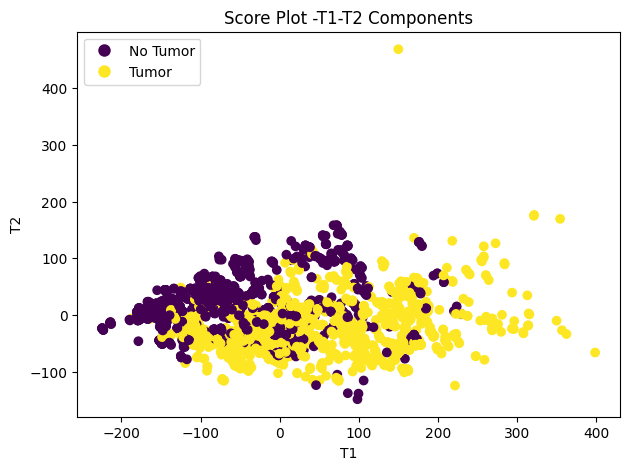

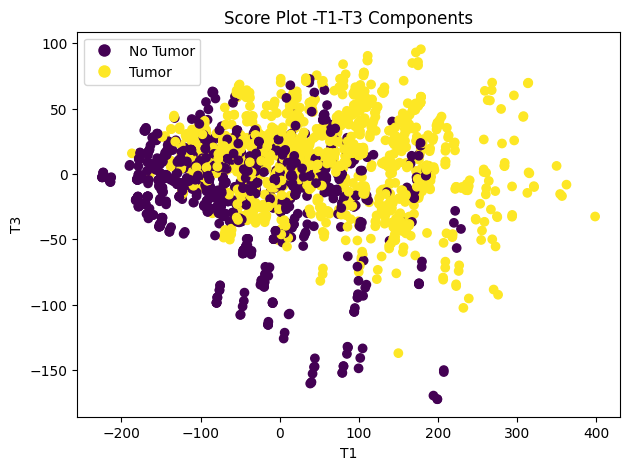

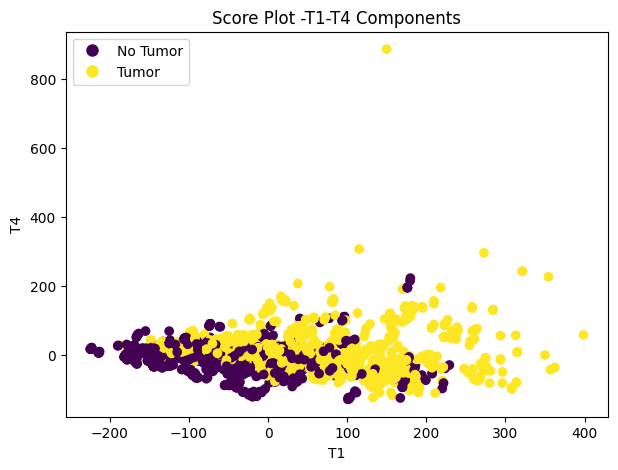

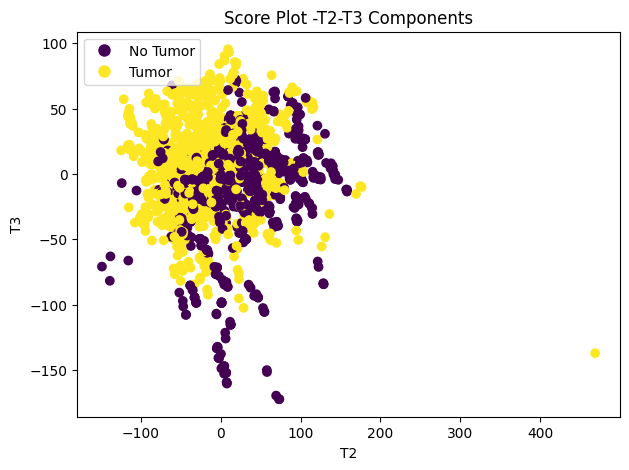

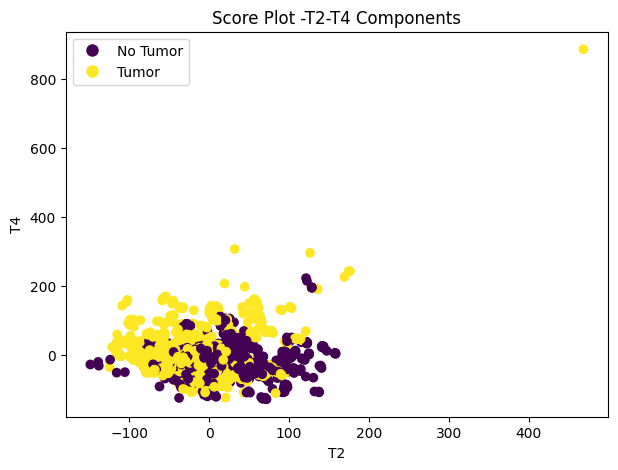

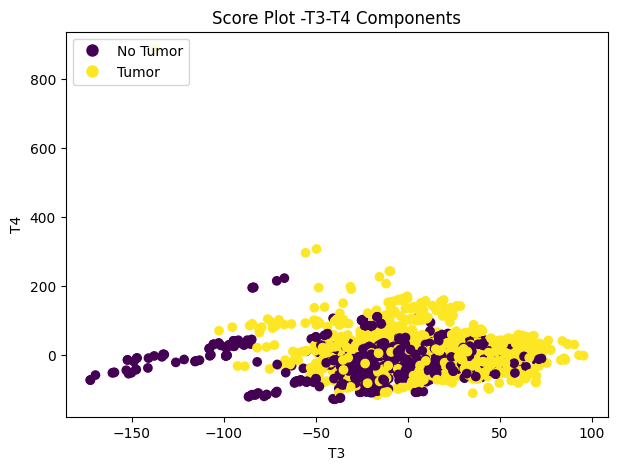

In [34]:
score_plot_pls(0,1)
score_plot_pls(0,2)
score_plot_pls(0,3)
score_plot_pls(1,2)
score_plot_pls(1,3)
score_plot_pls(2,3)

In [ ]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {'n_estimators':[100,300,500],'max_depth':[6,12,18]}
grid = GridSearchCV(rfc,param_grid,verbose=3)
grid.fit(x_train_pca,y_train)
grid.best_params_

In [49]:
#perform random forest classification
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=300,max_depth=12, random_state=42, n_jobs=-1)
rfc.fit(x_train_pca,y_train)
preds = rfc.predict(x_test_pca)
print("Time taken to train: ",time.time()-start_time)
print("Accuracy: ",accuracy_score(y_test,preds))

Time taken to train:  19.394559383392334
Accuracy:  0.965


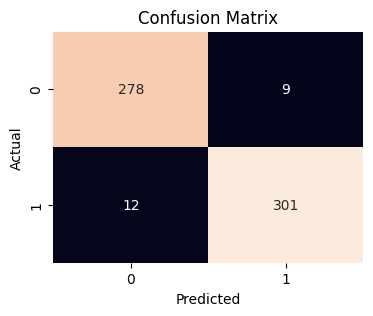

In [52]:
#confusion matrix as a heatmap
cm = confusion_matrix(y_test,preds)
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True,fmt='d',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [50]:
#svm classifier with time to execute
start_time = time.time()
svc = SVC(random_state=42)
svc.fit(x_train_pca,y_train)
preds1 = svc.predict(x_test_pca)
end_time = time.time()
print("Time to execute: ",end_time-start_time)
print("Accuracy: ",accuracy_score(y_test,preds1))


Time to execute:  4.933341979980469
Accuracy:  0.96


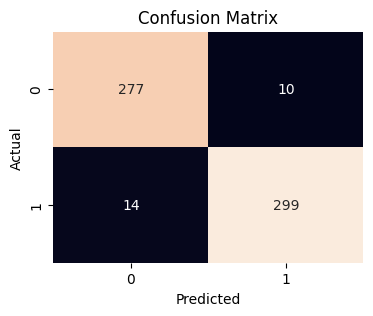

In [51]:
#confusion matrix as a heatmap
cm = confusion_matrix(y_test,preds1)
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True,fmt='d',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()